# Evaluation procedure

# 1) Train and Test on the Entire Dataset

1: Train the Model on entire dataset

2: Test the Model on the Same dataset, and evaluate how well we did by comparing the predicted
    response values with the TRUE response values

In [1]:
from sklearn.datasets import load_iris
iris=load_iris()

X=iris.data
y=iris.target
x_new=[[4,5,3,4]]

# Logistic Regression

In [2]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()
logreg.fit(X,y)
y_pred=logreg.predict(X)
print(y_pred)
len(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


/home/bhuvi/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


150

Classification Accuracy:

:)  Proportion of correct predictions
:)  Common Evaluation metric for classification problems

In [3]:
from sklearn import metrics
print(metrics.accuracy_score(y,y_pred))

0.9733333333333334


:) known as the training accuracy when train and test the data on the same data

# KNN(k=1)

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X,y)
y_pred=knn.predict(X)
metrics.accuracy_score(y,y_pred)

1.0

# KNN(k=5)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)
y_pred=knn.predict(X)
metrics.accuracy_score(y,y_pred)

0.9666666666666667

# Problems with testing on Same data

# 2) Train/test split

In [6]:
#step1) split the datasets into train and test datasets
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(90, 4)
(60, 4)
(90,)
(60,)


In [9]:
#step2 Train the model using different dataset
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

/home/bhuvi/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
y_pred=logreg.predict(X_test)
y_pred

array([0, 2, 1, 0, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 0, 2, 1, 1, 0, 1, 2, 2,
       0, 2, 2, 0, 1, 1, 1, 0, 2, 2, 2, 2, 0, 1, 2, 0, 1, 1, 0, 2, 1, 0,
       1, 0, 0, 0, 0, 1, 2, 0, 1, 1, 2, 1, 2, 1, 2, 2])

In [11]:
metrics.accuracy_score(y_pred,y_test)

0.9833333333333333

# KNN (k=1)

In [12]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.9666666666666667


# KNN (k=5)

In [13]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.9833333333333333

# Better value for Locate K

In [14]:
k_range = range(1,26)
scores=[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))

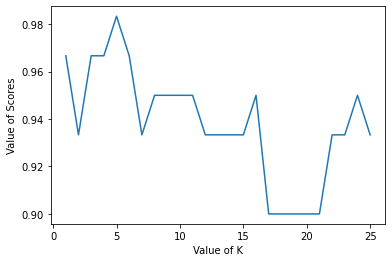

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k_range,scores)
plt.xlabel("Value of K")
plt.ylabel("Value of Scores")
plt.show()

# Making predictions out of sample data 

In [16]:
knn=KNeighborsClassifier(n_neighbors=12)
knn.fit(X,y)
y_pred=knn.predict(x_new)
solution=int(y_pred)
iris.target_names[solution]

'versicolor'

# Downsides of Train split data 